In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\HP\\ML'

In [4]:
os.chdir('G:\\Araiba_Database')

## Import Data

In [5]:
data_train = pd.read_csv("restaurant_prediction\\train.csv")
data_test = pd.read_csv("restaurant_prediction\\test.csv")
data_train = data_train.drop(["Id"],axis=1)
data_test = data_test.drop(["Id"],axis =1)

## Take a look at data structure

In [6]:
data_train.head()

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open Date   137 non-null    object 
 1   City        137 non-null    object 
 2   City Group  137 non-null    object 
 3   Type        137 non-null    object 
 4   P1          137 non-null    int64  
 5   P2          137 non-null    float64
 6   P3          137 non-null    float64
 7   P4          137 non-null    float64
 8   P5          137 non-null    int64  
 9   P6          137 non-null    int64  
 10  P7          137 non-null    int64  
 11  P8          137 non-null    int64  
 12  P9          137 non-null    int64  
 13  P10         137 non-null    int64  
 14  P11         137 non-null    int64  
 15  P12         137 non-null    int64  
 16  P13         137 non-null    float64
 17  P14         137 non-null    int64  
 18  P15         137 non-null    int64  
 19  P16         137 non-null    i

In [8]:
data_train.describe()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,5.489051,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,1.847561,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [9]:
Type =data_train["Type"].value_counts()
cities = data_train["City"].value_counts()
city_group=data_train["City Group"].value_counts()

In [10]:
print(Type)
print(cities)
print(city_group)
print(f"len of Type:{len(Type)}\nlen of cities:{len(cities)}\nlen of city_group{len(city_group)}")

FC    76
IL    60
DT     1
Name: Type, dtype: int64
İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Kayseri            3
Diyarbakır         3
Tekirdağ           3
Adana              3
Eskişehir          3
Aydın              2
Muğla              2
Konya              2
Trabzon            2
Kastamonu          1
Tokat              1
Balıkesir          1
Kocaeli            1
Osmaniye           1
Elazığ             1
Kırklareli         1
Kütahya            1
Denizli            1
Amasya             1
Afyonkarahisar     1
Uşak               1
Karabük            1
Bolu               1
Gaziantep          1
Isparta            1
Edirne             1
Şanlıurfa          1
Name: City, dtype: int64
Big Cities    78
Other         59
Name: City Group, dtype: int64
len of Type:3
len of cities:34
len of city_group2


In [11]:
Type_test =data_test["Type"].value_counts()
cities_test = data_test["City"].value_counts()
city_group_test=data_test["City Group"].value_counts()

In [12]:
print(Type_test)
print(cities_test)
print(city_group_test)
print(f"len of Type:{len(Type_test)}\nlen of cities:{len(cities_test)}\nlen of city_group{len(city_group_test)}")

FC    57019
IL    40447
DT     2244
MB      290
Name: Type, dtype: int64
İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Sakarya             604
Batman              604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun         

In [13]:
#as here value in city and type train column is different from value in test city column we will drop city column 
data_train = data_train.drop(["City","Type"],axis=1)
data_test = data_test.drop(["City","Type"],axis =1)

In [14]:
data_train["P1"].value_counts()

2     36
4     35
3     31
12    12
1      9
6      6
9      4
5      4
Name: P1, dtype: int64

In [15]:
data_train["P5"].value_counts()

2    67
1    48
4    12
3     6
8     2
6     1
5     1
Name: P5, dtype: int64

## Exploratory Data Analysis

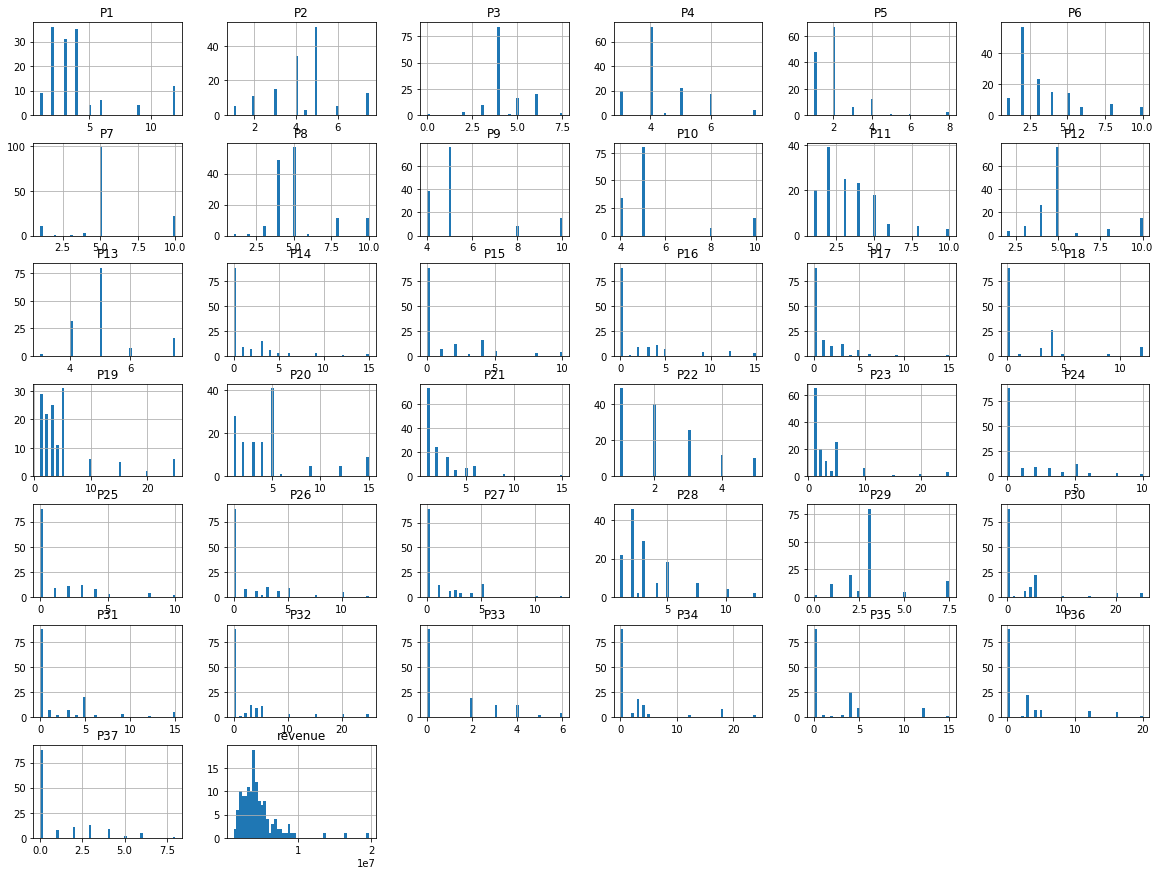

In [16]:
data_train.hist(bins=50,figsize=(20,15))
plt.show()

In [17]:
data_train["P7"].value_counts()

5     99
10    22
1     11
4      3
3      1
2      1
Name: P7, dtype: int64

array([[<AxesSubplot:title={'center':'P26'}>,
        <AxesSubplot:title={'center':'P27'}>],
       [<AxesSubplot:title={'center':'P28'}>,
        <AxesSubplot:title={'center':'P29'}>]], dtype=object)

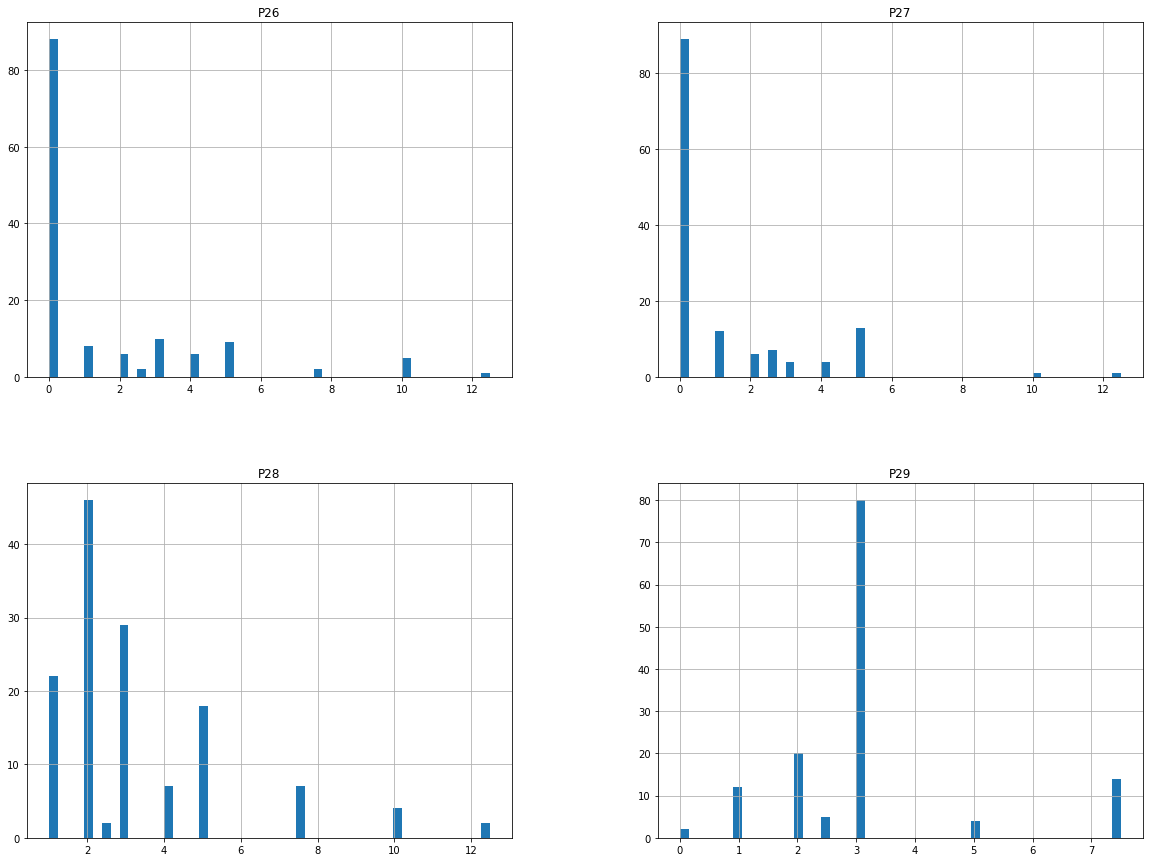

In [18]:
attributes =["P26","P27","P28","P29"]
data_train[attributes].hist(bins= 50,figsize=(20,15))

## Looking for Correlation

In [19]:
corr_matrix = data_train.corr()

In [20]:
corr_matrix["revenue"].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

array([[<AxesSubplot:xlabel='revenue', ylabel='revenue'>,
        <AxesSubplot:xlabel='P2', ylabel='revenue'>,
        <AxesSubplot:xlabel='P28', ylabel='revenue'>,
        <AxesSubplot:xlabel='P6', ylabel='revenue'>,
        <AxesSubplot:xlabel='P21', ylabel='revenue'>],
       [<AxesSubplot:xlabel='revenue', ylabel='P2'>,
        <AxesSubplot:xlabel='P2', ylabel='P2'>,
        <AxesSubplot:xlabel='P28', ylabel='P2'>,
        <AxesSubplot:xlabel='P6', ylabel='P2'>,
        <AxesSubplot:xlabel='P21', ylabel='P2'>],
       [<AxesSubplot:xlabel='revenue', ylabel='P28'>,
        <AxesSubplot:xlabel='P2', ylabel='P28'>,
        <AxesSubplot:xlabel='P28', ylabel='P28'>,
        <AxesSubplot:xlabel='P6', ylabel='P28'>,
        <AxesSubplot:xlabel='P21', ylabel='P28'>],
       [<AxesSubplot:xlabel='revenue', ylabel='P6'>,
        <AxesSubplot:xlabel='P2', ylabel='P6'>,
        <AxesSubplot:xlabel='P28', ylabel='P6'>,
        <AxesSubplot:xlabel='P6', ylabel='P6'>,
        <AxesSubplot:xlabel=

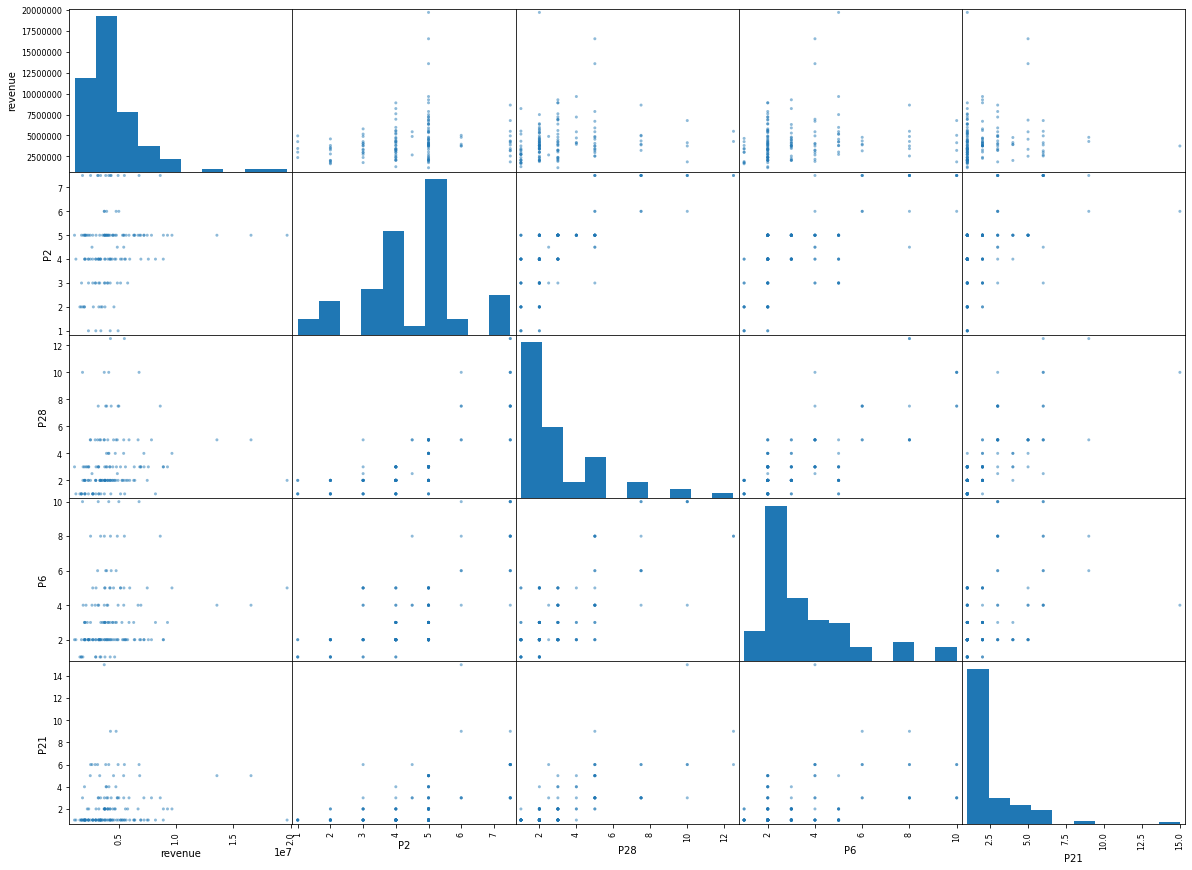

In [21]:
# using scatter matrix to check correlation for highly corelated features
attributes =["revenue","P2","P28","P6","P21"]
pd.plotting.scatter_matrix(data_train[attributes],figsize=(20,15))

## Preparing Data 

In [22]:
data_train["Open Date"]

0      07/17/1999
1      02/14/2008
2      03/09/2013
3      02/02/2012
4      05/09/2009
          ...    
132    06/25/2008
133    10/12/2006
134    07/08/2006
135    10/29/2010
136    09/01/2009
Name: Open Date, Length: 137, dtype: object

In [23]:
from sklearn.base import BaseEstimator,TransformerMixin
Open_date_inx = 0
class add_days_attribute(BaseEstimator,TransformerMixin):
    def __init__(self):
        self.currentDate= "3/23/2015"
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        X[:,Open_Date_inx] =pd.to_datetimeX[:,Open_Date_inx],format="%m/%d/%Y"
        X["currentDate"] = self.currentDate
        X["currentDate"] = pd.to_datetime(X["currentDate"],format="")        

In [24]:
Date = "3/23/2015"

In [25]:
data_train["Open Date"] =pd.to_datetime(data_train["Open Date"],format="%m/%d/%Y")
data_test["Open Date"] = pd.to_datetime(data_test["Open Date"],format='%m/%d/%Y')
data_train["Date_now"] = Date
data_test["Date_now"] = Date
data_train["Date_now"] = pd.to_datetime(data_train["Date_now"],format="%m/%d/%Y")
data_test["Date_now"] = pd.to_datetime(data_test["Date_now"],format= "%m/%d/%Y")

In [26]:
data_train["Days_Opened"]= data_train["Date_now"] - data_train["Open Date"]
data_train["Days_Opened"]= data_train["Days_Opened"].dt.days
drop_attributes =["Open Date","Date_now"]
data_train = data_train.drop(drop_attributes,axis=1)

In [27]:
data_test["Days_Opened"] = data_test["Date_now"]- data_test["Open Date"]
data_test["Days_Opened"] = data_test["Days_Opened"].dt.days
data_test = data_test.drop(drop_attributes,axis=1)

In [28]:
data_X_train =data_train.drop("revenue",axis=1)
data_y_train = data_train["revenue"]

In [34]:
data_train_num=data_X_train[["P2","P28","P6", "P21","P11","P27","P29"]]
data_train_cat = data_X_train["City Group"]

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
data_train_num

,P2,P28,P6,P21,P11,P27,P29
0,5.0,2.0,2,1,3,4.0,3.0
1,5.0,3.0,2,1,1,0.0,3.0
2,4.0,1.0,3,1,2,0.0,3.0
3,4.5,2.5,4,6,8,2.5,7.5
4,4.0,1.0,2,1,2,5.0,3.0
...,...,...,...,...,...,...,...
132,3.0,2.0,2,2,4,0.0,3.0
133,5.0,3.0,3,2,5,0.0,3.0
134,4.0,2.0,3,1,1,0.0,3.0
135,5.0,3.0,2,1,2,0.0,3.0


In [37]:
data_train

,City Group,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,Days_Opened
0,Big Cities,4,5.0,4.0,4.0,2,2,5,4,5,...,5,3,4,5,5,4,3,4,5653753.0,5728
1,Big Cities,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,0,0,0,6923131.0,2594
2,Other,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,2055379.0,744
3,Other,6,4.5,6.0,6.0,4,4,10,8,10,...,25,12,10,6,18,12,12,6,2675511.0,1145
4,Other,3,4.0,3.0,4.0,2,2,5,5,5,...,5,1,3,2,3,4,3,3,4316715.0,2144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Other,2,3.0,3.0,5.0,4,2,4,4,4,...,0,0,0,0,0,0,0,0,5787594.0,2462
133,Big Cities,4,5.0,4.0,4.0,2,3,5,4,4,...,0,0,0,0,0,0,0,0,9262754.0,3084
134,Other,3,4.0,4.0,4.0,2,3,5,5,5,...,0,0,0,0,0,0,0,0,2544857.0,3180
135,Big Cities,4,5.0,4.0,5.0,2,2,5,5,5,...,0,0,0,0,0,0,0,0,7217634.0,1606


In [40]:
from sklearn.compose import ColumnTransformer

num_attribs = list(data_train_num)
cat_attribs = ["City Group"]

full_pipeline = ColumnTransformer([
        ("num", "passthrough", num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data_train)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
tree_reg = RandomForestRegressor()

In [44]:
tree_reg.fit(data_prepared,data_y_train)

RandomForestRegressor()

In [45]:
data_test_prepared = full_pipeline.fit_transform(data_test)

In [46]:
X = pd.DataFrame(data_test_prepared)

In [47]:
X

,0,1,2,3,4,5,6,7,8
0,4.0,2.0,2.0,3.0,5.0,0.0,3.0,0.0,1.0
1,4.0,1.0,2.0,3.0,2.0,0.0,3.0,0.0,1.0
2,4.0,2.0,2.0,5.0,4.0,0.0,3.0,1.0,0.0
3,4.0,2.0,3.0,3.0,3.0,0.0,3.0,0.0,1.0
4,4.0,5.0,2.0,3.0,3.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
99995,5.0,2.0,2.0,1.0,4.0,0.0,3.0,0.0,1.0
99996,2.0,1.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0
99997,5.0,4.0,2.0,4.0,5.0,3.0,1.0,1.0,0.0
99998,7.5,7.5,4.0,3.0,6.0,0.0,5.0,1.0,0.0


In [48]:
Y = pd.DataFrame(data_prepared)

In [49]:
Y

,0,1,2,3,4,5,6,7,8
0,5.0,2.0,2.0,1.0,3.0,4.0,3.0,1.0,0.0
1,5.0,3.0,2.0,1.0,1.0,0.0,3.0,1.0,0.0
2,4.0,1.0,3.0,1.0,2.0,0.0,3.0,0.0,1.0
3,4.5,2.5,4.0,6.0,8.0,2.5,7.5,0.0,1.0
4,4.0,1.0,2.0,1.0,2.0,5.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
132,3.0,2.0,2.0,2.0,4.0,0.0,3.0,0.0,1.0
133,5.0,3.0,3.0,2.0,5.0,0.0,3.0,1.0,0.0
134,4.0,2.0,3.0,1.0,1.0,0.0,3.0,0.0,1.0
135,5.0,3.0,2.0,1.0,2.0,0.0,3.0,1.0,0.0


In [50]:
prediction = tree_reg.predict(data_test_prepared)

In [51]:
prediction

array([4336484.9275, 2805745.97  , 5042151.07  , ..., 3365679.76  ,
       4835749.3   , 5792969.48  ])

In [84]:
final = pd.DataFrame()

In [85]:
final["Prediction"]= prediction

In [87]:
final["Id"] = final.index

In [89]:
Id = final.pop("Id")

In [90]:
final.insert(0,"Id",Id)

In [91]:
final

,Id,Prediction
0,0,4.336485e+06
1,1,2.805746e+06
2,2,5.042151e+06
3,3,4.206139e+06
4,4,6.187994e+06
...,...,...
99995,99995,4.842916e+06
99996,99996,1.813173e+06
99997,99997,3.365680e+06
99998,99998,4.835749e+06


In [92]:
final.to_csv("Submission.csv",index=False)